In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.创建对象

In [2]:
#创建一个Series对象
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
# 通过numpy数组创建一个DateFrame对象，包括索引和列标签
dates = pd.date_range('20130101', periods=6) #创建日期索引
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

df

,A,B,C,D
2013-01-01,0.720832,-0.037438,0.665454,1.164196
2013-01-02,0.441297,0.371961,-1.698605,2.697316
2013-01-03,0.392354,-2.029036,-0.407181,-0.268095
2013-01-04,0.071821,0.659870,1.866793,-1.420491
2013-01-05,-0.089463,-1.316072,-0.613822,0.241329
2013-01-06,-1.406976,-1.459327,1.074056,0.841889


In [5]:
# 通过字典方式创建DataFrame对象
df2 = pd.DataFrame({ 'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [6]:
# 查看各列的类型
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## 2.查看数据

In [7]:
# 查看DataFrame头5行
df.head()

,A,B,C,D
2013-01-01,0.720832,-0.037438,0.665454,1.164196
2013-01-02,0.441297,0.371961,-1.698605,2.697316
2013-01-03,0.392354,-2.029036,-0.407181,-0.268095
2013-01-04,0.071821,0.659870,1.866793,-1.420491
2013-01-05,-0.089463,-1.316072,-0.613822,0.241329


In [8]:
# 查看DataFrame尾3行
df.tail(3)

,A,B,C,D
2013-01-04,0.071821,0.659870,1.866793,-1.420491
2013-01-05,-0.089463,-1.316072,-0.613822,0.241329
2013-01-06,-1.406976,-1.459327,1.074056,0.841889


In [9]:
# 显示索引
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
# 显示列标签
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [11]:
# 显示底层numpy数据
df.values

array([[ 0.72083219, -0.03743795,  0.66545433,  1.1641961 ],
       [ 0.44129684,  0.37196096, -1.69860546,  2.6973159 ],
       [ 0.39235386, -2.02903587, -0.40718066, -0.26809483],
       [ 0.07182146,  0.65987002,  1.86679285, -1.42049113],
       [-0.08946266, -1.31607172, -0.61382168,  0.24132859],
       [-1.40697559, -1.45932685,  1.07405616,  0.84188909]])

In [12]:
# 查看快速统计汇总结果
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.021644,-0.635007,0.147783,0.542691
std,0.756071,1.107651,1.294460,1.394308
min,-1.406976,-2.029036,-1.698605,-1.420491
25%,-0.049142,-1.423513,-0.562161,-0.140739
50%,0.232088,-0.676755,0.129137,0.541609
75%,0.429061,0.269611,0.971906,1.083619
max,0.720832,0.659870,1.866793,2.697316


In [13]:
# 转置数据
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.720832,0.441297,0.392354,0.071821,-0.089463,-1.406976
B,-0.037438,0.371961,-2.029036,0.659870,-1.316072,-1.459327
C,0.665454,-1.698605,-0.407181,1.866793,-0.613822,1.074056
D,1.164196,2.697316,-0.268095,-1.420491,0.241329,0.841889


In [14]:
# 按索引排序
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.164196,0.665454,-0.037438,0.720832
2013-01-02,2.697316,-1.698605,0.371961,0.441297
2013-01-03,-0.268095,-0.407181,-2.029036,0.392354
2013-01-04,-1.420491,1.866793,0.659870,0.071821
2013-01-05,0.241329,-0.613822,-1.316072,-0.089463
2013-01-06,0.841889,1.074056,-1.459327,-1.406976


In [15]:
# 按制定列的值排序
df.sort_values(by='B')

,A,B,C,D
2013-01-03,0.392354,-2.029036,-0.407181,-0.268095
2013-01-06,-1.406976,-1.459327,1.074056,0.841889
2013-01-05,-0.089463,-1.316072,-0.613822,0.241329
2013-01-01,0.720832,-0.037438,0.665454,1.164196
2013-01-02,0.441297,0.371961,-1.698605,2.697316
2013-01-04,0.071821,0.659870,1.866793,-1.420491


## 3.选择数据
*注意：标准Python/Numpy的数据选择和设置很直观和方便，但是在生产环境，我们推荐优化的pandas方法，如at, .iat, .loc, .iloc 和 .ix*

### 3.1 选择数据

In [16]:
# 通过df['A']选择该列数据，这将返回Series数据类型，等同于 df.A 
df['A']

2013-01-01    0.720832
2013-01-02    0.441297
2013-01-03    0.392354
2013-01-04    0.071821
2013-01-05   -0.089463
2013-01-06   -1.406976
Freq: D, Name: A, dtype: float64

In [17]:
# 通过 [] 选择行数据
df[0:3] #选择1~3行的数据

,A,B,C,D
2013-01-01,0.720832,-0.037438,0.665454,1.164196
2013-01-02,0.441297,0.371961,-1.698605,2.697316
2013-01-03,0.392354,-2.029036,-0.407181,-0.268095


In [18]:
df['20130102':'20130104'] #通过索引选择数据

,A,B,C,D
2013-01-02,0.441297,0.371961,-1.698605,2.697316
2013-01-03,0.392354,-2.029036,-0.407181,-0.268095
2013-01-04,0.071821,0.659870,1.866793,-1.420491


### 3.2 列标签选择数据

In [19]:
# 通过date索引获取一个横截面（cross section）数据
df.loc[dates[0]]

A    0.720832
B   -0.037438
C    0.665454
D    1.164196
Name: 2013-01-01 00:00:00, dtype: float64

In [20]:
# 多个标签获取数据
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,0.720832,-0.037438
2013-01-02,0.441297,0.371961
2013-01-03,0.392354,-2.029036
2013-01-04,0.071821,0.659870
2013-01-05,-0.089463,-1.316072
2013-01-06,-1.406976,-1.459327


In [21]:
# 切片数据
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.441297,0.371961
2013-01-03,0.392354,-2.029036
2013-01-04,0.071821,0.659870


In [22]:
# 在切片数据上精简维度
df.loc['20130102',['A','B']]

A    0.441297
B    0.371961
Name: 2013-01-02 00:00:00, dtype: float64

In [23]:
# 获取一个标量数据
df.loc[dates[0],'A']

0.72083218845288211

In [24]:
# 更快速地获取标量数据
df.at[dates[0],'A']

0.72083218845288211

### 3.3 通过位置获取数据

In [25]:
# 通过传入一个整数值定位
df.iloc[3]

A    0.071821
B    0.659870
C    1.866793
D   -1.420491
Name: 2013-01-04 00:00:00, dtype: float64

In [26]:
# 通过切片定位
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.071821,0.659870
2013-01-05,-0.089463,-1.316072


In [27]:
# 通过整数列表定位
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.441297,-1.698605
2013-01-03,0.392354,-0.407181
2013-01-05,-0.089463,-0.613822


In [28]:
# 指定行切片
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.441297,0.371961,-1.698605,2.697316
2013-01-03,0.392354,-2.029036,-0.407181,-0.268095


In [29]:
# 指定列切片
df.iloc[:,1:3]

,B,C
2013-01-01,-0.037438,0.665454
2013-01-02,0.371961,-1.698605
2013-01-03,-2.029036,-0.407181
2013-01-04,0.659870,1.866793
2013-01-05,-1.316072,-0.613822
2013-01-06,-1.459327,1.074056


In [30]:
# 通过位置获取值
df.iloc[1,1]

0.3719609644341193

In [31]:
#  还是通过位置获取值
df.iat[1,1]

0.3719609644341193

### 3.4 布尔索引

In [32]:
# 通过单列值获取
df[df.A > 0]

,A,B,C,D
2013-01-01,0.720832,-0.037438,0.665454,1.164196
2013-01-02,0.441297,0.371961,-1.698605,2.697316
2013-01-03,0.392354,-2.029036,-0.407181,-0.268095
2013-01-04,0.071821,0.659870,1.866793,-1.420491


In [33]:
# 类似where操作取值
df[df > 0]

,A,B,C,D
2013-01-01,0.720832,NaN,0.665454,1.164196
2013-01-02,0.441297,0.371961,NaN,2.697316
2013-01-03,0.392354,NaN,NaN,NaN
2013-01-04,0.071821,0.659870,1.866793,NaN
2013-01-05,NaN,NaN,NaN,0.241329
2013-01-06,NaN,NaN,1.074056,0.841889


In [34]:
# isin()方法
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']

df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.392354,-2.029036,-0.407181,-0.268095,two
2013-01-05,-0.089463,-1.316072,-0.613822,0.241329,four


### 3.5 赋值

In [35]:
# 相同索引赋值一列数据
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))

s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [36]:
df['F'] = s1

In [37]:
# 通过标签赋值
df.at[dates[0],'A'] = 0

In [38]:
# 通过位置赋值
df.iat[0,1] = 0

In [39]:
# numpy数组赋值
df.loc[:,'D'] = np.array([5] * len(df))

In [40]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.665454,5,NaN
2013-01-02,0.441297,0.371961,-1.698605,5,1.0
2013-01-03,0.392354,-2.029036,-0.407181,5,2.0
2013-01-04,0.071821,0.659870,1.866793,5,3.0
2013-01-05,-0.089463,-1.316072,-0.613822,5,4.0
2013-01-06,-1.406976,-1.459327,1.074056,5,5.0


In [41]:
# where操作赋值
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.665454,-5,NaN
2013-01-02,-0.441297,-0.371961,-1.698605,-5,-1.0
2013-01-03,-0.392354,-2.029036,-0.407181,-5,-2.0
2013-01-04,-0.071821,-0.659870,-1.866793,-5,-3.0
2013-01-05,-0.089463,-1.316072,-0.613822,-5,-4.0
2013-01-06,-1.406976,-1.459327,-1.074056,-5,-5.0


## 4.处理缺失数据

In [42]:
# 使用reindex()方法在指定的轴上增/删/改原索引
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.665454,5,NaN,1.0
2013-01-02,0.441297,0.371961,-1.698605,5,1.0,1.0
2013-01-03,0.392354,-2.029036,-0.407181,5,2.0,NaN
2013-01-04,0.071821,0.659870,1.866793,5,3.0,NaN


In [43]:
# 删除有缺失值的行
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.441297,0.371961,-1.698605,5,1.0,1.0


In [44]:
# 填充缺失数据
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.665454,5,5.0,1.0
2013-01-02,0.441297,0.371961,-1.698605,5,1.0,1.0
2013-01-03,0.392354,-2.029036,-0.407181,5,2.0,5.0
2013-01-04,0.071821,0.659870,1.866793,5,3.0,5.0


In [45]:
# 判断是否缺失，True为缺失
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## 5.数据操作
*一般操作不包括丢失的数据。*

In [46]:
# 执行描述性统计
df.mean()

A   -0.098494
B   -0.628767
C    0.147783
D    5.000000
F    3.000000
dtype: float64

In [47]:
# 在另一个轴上进行相同操作
df.mean(1)

2013-01-01    1.416364
2013-01-02    1.022930
2013-01-03    0.991227
2013-01-04    2.119697
2013-01-05    1.396129
2013-01-06    1.641551
Freq: D, dtype: float64

In [48]:
# pandas操作不同维度的数据需要对齐，另外它会按指定的维度方向计算：
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.607646,-3.029036,-1.407181,4.0,1.0
2013-01-04,-2.928179,-2.340130,-1.133207,2.0,0.0
2013-01-05,-5.089463,-6.316072,-5.613822,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### 5.1 apply方法

In [49]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.665454,5,NaN
2013-01-02,0.441297,0.371961,-1.033151,10,1.0
2013-01-03,0.833651,-1.657075,-1.440332,15,3.0
2013-01-04,0.905472,-0.997205,0.426461,20,6.0
2013-01-05,0.816009,-2.313277,-0.187361,25,10.0
2013-01-06,-0.590966,-3.772603,0.886696,30,15.0


In [50]:
df.apply(lambda x: x.max() - x.min())

A    1.848272
B    2.688906
C    3.565398
D    0.000000
F    4.000000
dtype: float64

### 5.2 直方图

In [51]:
s = pd.Series(np.random.randint(0, 7, size=10))
              
s

0    0
1    1
2    5
3    6
4    2
5    1
6    1
7    6
8    1
9    5
dtype: int32

In [52]:
s.value_counts()

1    4
6    2
5    2
2    1
0    1
dtype: int64

### 5.3 字符串方法

In [53]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [54]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 6.合并

### 6.1 concat方法

In [55]:
df = pd.DataFrame(np.random.randn(10, 4))

df

,0,1,2,3
0,0.063615,0.731285,1.078632,-0.619071
1,-1.314661,-0.677192,1.444915,0.675420
2,-0.251238,-0.017574,0.951569,-1.674977
3,1.073520,0.004890,-1.297129,0.606290
4,-0.642927,0.758806,0.414415,-0.671553
5,-0.266746,-1.137835,-0.726500,-0.145406
6,0.738105,-0.709359,0.666253,-0.617149
7,-1.201957,-0.985993,-0.214224,0.924374
8,-0.140033,0.761595,-0.442854,0.762947
9,0.740027,0.241928,-0.272540,-1.374602


In [56]:
pieces = [df[:3], df[3:7], df[7:]]

In [57]:
pd.concat(pieces)

,0,1,2,3
0,0.063615,0.731285,1.078632,-0.619071
1,-1.314661,-0.677192,1.444915,0.675420
2,-0.251238,-0.017574,0.951569,-1.674977
3,1.073520,0.004890,-1.297129,0.606290
4,-0.642927,0.758806,0.414415,-0.671553
5,-0.266746,-1.137835,-0.726500,-0.145406
6,0.738105,-0.709359,0.666253,-0.617149
7,-1.201957,-0.985993,-0.214224,0.924374
8,-0.140033,0.761595,-0.442854,0.762947
9,0.740027,0.241928,-0.272540,-1.374602


### 6.2 join方法

In [58]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [59]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### 6.3 append方法

In [60]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

df

,A,B,C,D
0,0.578360,-1.191693,-0.550403,-0.811041
1,0.288142,-0.337930,0.394765,0.341141
2,0.185839,1.390474,1.270147,-1.183846
3,-0.176520,0.745597,-1.809291,1.786944
4,-1.040675,2.125470,0.660236,-0.669793
5,0.039815,0.336281,1.975102,-0.222983
6,0.029727,0.470606,-1.097596,1.881814
7,-1.113772,0.998652,-0.695082,0.575193


In [61]:
s = df.iloc[3]

In [62]:
df.append(s, ignore_index=True)

,A,B,C,D
0,0.578360,-1.191693,-0.550403,-0.811041
1,0.288142,-0.337930,0.394765,0.341141
2,0.185839,1.390474,1.270147,-1.183846
3,-0.176520,0.745597,-1.809291,1.786944
4,-1.040675,2.125470,0.660236,-0.669793
5,0.039815,0.336281,1.975102,-0.222983
6,0.029727,0.470606,-1.097596,1.881814
7,-1.113772,0.998652,-0.695082,0.575193
8,-0.176520,0.745597,-1.809291,1.786944


## 7.分组
在group by的时候涉及到以下几步：
- Spliting 按条件分割数据
- Applying 在每组上应用函数
- Combing 合并成一个数据集

In [63]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})

df

,A,B,C,D
0,foo,one,-0.027840,-0.191183
1,bar,one,0.477701,0.595091
2,foo,two,-0.166196,-1.047963
3,bar,three,-1.412667,-2.541769
4,foo,two,1.064605,0.652580
5,bar,two,0.310393,-0.362031
6,foo,one,-1.858794,-0.647183
7,foo,three,-0.123377,0.489792


In [64]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.624573,-2.308709
foo,-1.111602,-0.743958


In [65]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.477701  0.595091
    three -1.412667 -2.541769
    two    0.310393 -0.362031
foo one   -1.886635 -0.838367
    three -0.123377  0.489792
    two    0.898410 -0.395383

## 8.重塑
### 8.1 stack方法

In [66]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))

In [67]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [68]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [69]:
df2 = df[:4]

In [70]:
df2

A         B
first second                    
bar   one    -0.130844 -0.079959
      two     0.710488  1.333418
baz   one    -1.226135 -0.971208
      two    -0.589977 -0.766106

### 8.2 数据透视表

In [71]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})

df

,A,B,C,D,E
0,one,A,foo,1.210577,-1.436762
1,one,B,foo,1.043243,-0.285036
2,two,C,foo,-0.447437,-0.255693
3,three,A,bar,0.113447,0.739156
4,one,B,bar,-0.460571,0.384696
5,one,C,bar,0.225595,0.851877
6,two,A,foo,0.354549,0.614173
7,three,B,foo,0.490716,1.466602
8,one,C,foo,1.432253,-0.943974
9,one,A,bar,0.249119,-0.969126


In [72]:
# 通过pivot_table方法透视数据
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.249119  1.210577
      B -0.460571  1.043243
      C  0.225595  1.432253
three A  0.113447       NaN
      B       NaN  0.490716
      C -0.113564       NaN
two   A       NaN  0.354549
      B  0.012381       NaN
      C       NaN -0.447437

## 9.时间序列

In [73]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [74]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [75]:
ts.resample('5Min').sum() #将秒数据转换为5分钟数据

2012-01-01    22323
Freq: 5T, dtype: int32

In [76]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)

ts

2012-03-06    0.634740
2012-03-07   -0.613860
2012-03-08    0.109914
2012-03-09    0.647520
2012-03-10    0.374016
Freq: D, dtype: float64

In [77]:
ts_utc = ts.tz_localize('UTC') #时区表示

ts_utc

2012-03-06 00:00:00+00:00    0.634740
2012-03-07 00:00:00+00:00   -0.613860
2012-03-08 00:00:00+00:00    0.109914
2012-03-09 00:00:00+00:00    0.647520
2012-03-10 00:00:00+00:00    0.374016
Freq: D, dtype: float64

In [78]:
ts_utc.tz_convert('US/Eastern') #转换时区

2012-03-05 19:00:00-05:00    0.634740
2012-03-06 19:00:00-05:00   -0.613860
2012-03-07 19:00:00-05:00    0.109914
2012-03-08 19:00:00-05:00    0.647520
2012-03-09 19:00:00-05:00    0.374016
Freq: D, dtype: float64

In [79]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts

2012-01-31   -0.107510
2012-02-29   -0.250094
2012-03-31   -0.017552
2012-04-30    0.785153
2012-05-31    0.500075
Freq: M, dtype: float64

In [80]:
# 时区跨度转换
ps = ts.to_period() 

ps

2012-01   -0.107510
2012-02   -0.250094
2012-03   -0.017552
2012-04    0.785153
2012-05    0.500075
Freq: M, dtype: float64

In [81]:
ps.to_timestamp()

2012-01-01   -0.107510
2012-02-01   -0.250094
2012-03-01   -0.017552
2012-04-01    0.785153
2012-05-01    0.500075
Freq: MS, dtype: float64

In [82]:
# period和timestamp之间的转换让某些算术函数应用起来非常方便
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00   -2.025333
1990-06-01 09:00   -1.123658
1990-09-01 09:00    0.957243
1990-12-01 09:00   -0.833124
1991-03-01 09:00   -0.477455
Freq: H, dtype: float64

## 10.Categoricals
*从0.15版开始，DateFrame已经包含了categorical类型*

In [83]:
# 转换为categorical类型
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [84]:
# 重命名categorical类型
df["grade"].cat.categories = ["very good","good","very bad"]

In [85]:
# 重新排列并新增缺失数据
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [86]:
# 排序
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [87]:
# 分组
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 11.绘图

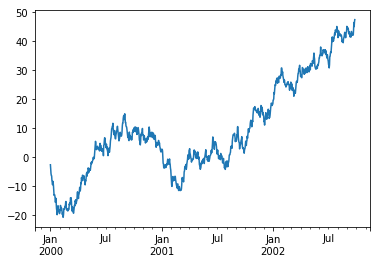

In [88]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

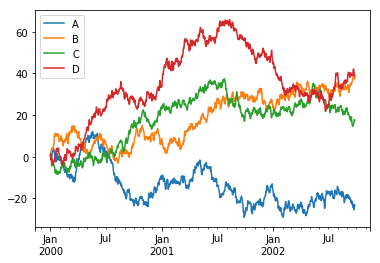

In [89]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                   columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

## 12.读写文件
### 12.1 CSV

In [90]:
# 将数据写入CSV中
df.to_csv('foo.csv')

In [91]:
# 读取CSV
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.388124,0.681368,-0.399332,0.588664
1,2000-01-02,1.172431,1.224067,-0.703455,1.385513
2,2000-01-03,0.565718,2.851465,-0.995057,-1.161525
3,2000-01-04,-1.165068,2.998046,-1.405335,-1.692008
4,2000-01-05,-1.290580,4.053031,-4.479818,-1.130690
5,2000-01-06,1.023199,3.648508,-3.099975,-0.980808
6,2000-01-07,1.651805,3.202926,-2.728675,-1.637219
7,2000-01-08,2.160235,3.829153,-2.968618,-1.850711
8,2000-01-09,3.148825,4.079719,-2.701066,-2.689806
9,2000-01-10,3.005343,3.939342,-2.625567,-3.792501


### 12.2 HDF5

In [92]:
# 写入HDF5
df.to_hdf('foo.h5','df')

In [93]:
# 读取HDF5
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,0.388124,0.681368,-0.399332,0.588664
2000-01-02,1.172431,1.224067,-0.703455,1.385513
2000-01-03,0.565718,2.851465,-0.995057,-1.161525
2000-01-04,-1.165068,2.998046,-1.405335,-1.692008
2000-01-05,-1.290580,4.053031,-4.479818,-1.130690
2000-01-06,1.023199,3.648508,-3.099975,-0.980808
2000-01-07,1.651805,3.202926,-2.728675,-1.637219
2000-01-08,2.160235,3.829153,-2.968618,-1.850711
2000-01-09,3.148825,4.079719,-2.701066,-2.689806
2000-01-10,3.005343,3.939342,-2.625567,-3.792501


### 12.3 Excel

In [94]:
# 写入excel
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [95]:
# 读取Excel
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,0.388124,0.681368,-0.399332,0.588664
2000-01-02,1.172431,1.224067,-0.703455,1.385513
2000-01-03,0.565718,2.851465,-0.995057,-1.161525
2000-01-04,-1.165068,2.998046,-1.405335,-1.692008
2000-01-05,-1.290580,4.053031,-4.479818,-1.130690
2000-01-06,1.023199,3.648508,-3.099975,-0.980808
2000-01-07,1.651805,3.202926,-2.728675,-1.637219
2000-01-08,2.160235,3.829153,-2.968618,-1.850711
2000-01-09,3.148825,4.079719,-2.701066,-2.689806
2000-01-10,3.005343,3.939342,-2.625567,-3.792501


## 13.陷阱

In [96]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().